# OpenCV Introduction
* In 1999, Intel created **OpenCV**
* **OpenCV** is a library of programming functions mainly aimed at real-time **computer vision**.
* It was written in C++ and binded with python.

In [3]:
import cv2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# imread(image read) is a function in cv2 that helps us read an image and directly convert image to numpy array so we no longer
# need to have that intermediary steps of using numpy and PIL
pic = cv2.imread('../Data/00-puppy.jpg')
type(pic) 

numpy.ndarray

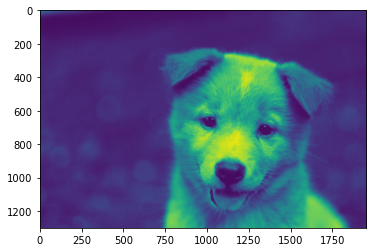

In [8]:
# cv2.imread takes takes two argument (file-path(compulsory),flag(optional))
# filename − It accepts an argument (filename), a variable of the String type representing the path of the file that
# is to be read.
# flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR. 
# For example (gray scale color will be flag = cv2.IMREAD_GRAYSCALE)
# cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. 
# It is the default flag. Alternatively, we can pass integer value 1 for this flag.
# cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer 
# value 0 for this flag.
# cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively,
# we can pass integer value -1 for this flag.

gray_pic = cv2.imread('../Data/00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_pic) 
# it's because matplotlib and opencv follows different orders of Red Green and Blue Channels
# the way matplotlib thinks of an image is -----> Red Green Blue
# the way opencv thinks of an image is -----> Blue Green Red
# the image is completely on gray scale because of different order it looks greenish.

# you can learn more about flags here [ https://www.tutorialspoint.com/opencv/opencv_imread_xxx_flag.htm ]

In [16]:
# a potential error that we need to know is , if we pass a wrong file path the imread function wont show error.
pic2 = cv2.imread('Data/OGGY.jpg') # OGGY.jpg does not exist in my machine
type(pic2)
# so thats what most of the time happens because we are not getting an error.
# we always need to double check the image path and need to check the type of object returned by imread if its of NoneType
# then we must have entered a wrong path

NoneType

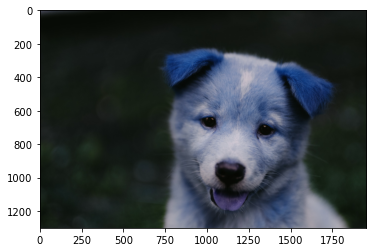

In [17]:
plt.imshow(pic)
# the image is looking weird right? 
# it's because matplotlib and opencv follows different orders of Red Green and Blue Channels
# the way matplotlib thinks of an image is -----> Red Green Blue
# the way opencv thinks of an image is -----> Blue Green Red

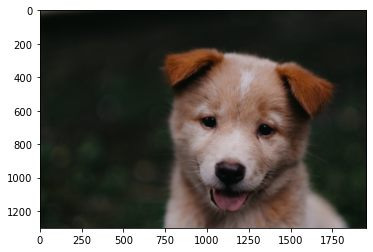

In [21]:
# to convert B G R(opencv) to R G B(matplotlib), we can use opencv function cvtColor(i.e. convert color)
# cv2.cvtColor() # 1st parameter of cvtColor is source or image 2nd parameter of is color code(for this we will use
# cv2.COLOR_BAYER_anyorder , so color_bayer holds whole bunch of different options to convert colors or we will use 
# cv2.COLOR_anyorder)
fix_pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB) # this will convert my BGR to RBG
plt.imshow(fix_pic)

(1300, 1950)


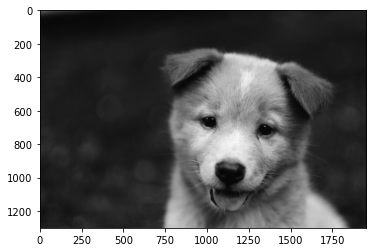

In [24]:
pic_gray = cv2.imread('../Data/00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
print(pic_gray.shape) # if we look at the shape it no longer has channel value because the image is grayscale image 
# Although it looks like green because of different color mappings which we have disscused above
# plt.imshow(pic_gray)
# to see in gray we can se cmap parameter of imshow
plt.imshow(pic_gray,cmap='gray')

### Resizing by Width & Height

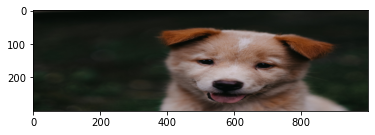

In [28]:
# we can resize an image using resize function of opencv
pic_resize = cv2.resize(fix_pic,(1000,300)) # 1st paramter is source/image 2nd parameter is destination_size(width,height)
# remember values in the dsize is swapped, the shape follows height & width and d_size follows width & height
# it does change the size for all three channels so we dont get any distortion accross the actual color channel.
plt.imshow(pic_resize)

### Resizing by Ratio

(650, 975, 3)


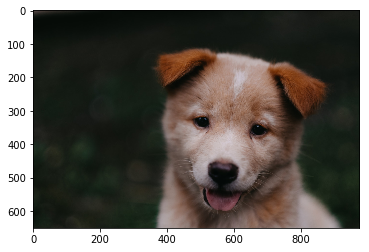

In [80]:
# sometimes we need to resize an image by ratio, so for this we would use the same resize function but the syntax would be 
# slightly different
# syntax - cv2.resize(img,(0,0),img,width_ratio,height_ratio)
rs_ratio = cv2.resize(fix_pic,(0,0),fix_pic,0.5,0.5)
plt.imshow(rs_ratio) # if we closely look at the image scale its actually the 0.5 or half of acutal fix_pic scale.
print(rs_ratio.shape)
# its shape is now (650, 975, 3) which actually the half of fix_pic's shape (1300/0.5, 1950/0.5,3)=(650, 975, 3)

## Flip an Image

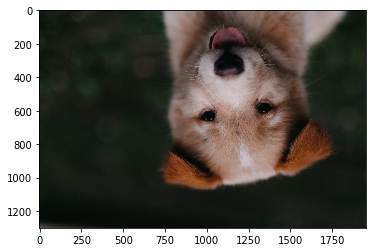

In [81]:
# now we can also flip images along axes using flip function
# flipping image will help in generating more images than we acutally have for deep learning purposes
# function takes mainly two parameter first is image and second is the number which defines the image to flip along that axis
flip_img = cv2.flip(fix_pic,0)
plt.imshow(flip_img)
# 0 means flip along horizontal axis(essentially upside down)

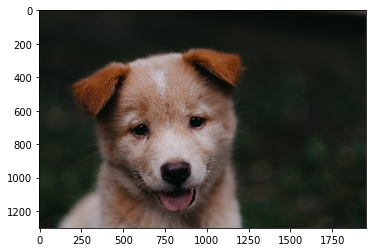

In [82]:
flip_img = cv2.flip(fix_pic,1)
plt.imshow(flip_img) # the original shows the dog more on right side but this one is not left
# 1 means flip along vertical middle axis

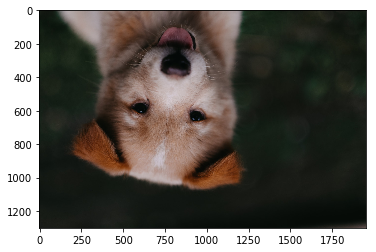

In [83]:
# if we want to do both(i.e. flip along horizontal axis and also flip along veritcal axis) we need pass just -1
flip_img = cv2.flip(fix_pic,-1)
plt.imshow(flip_img)

In [84]:
# we can save images to use later by using imwrite function of opencv that is just opposite of imread
# syntax - imread('file-path.ext',img)
cv2.imwrite('fixed_img.jpg',fix_pic)

True